In [1]:
%matplotlib inline
%load_ext autotime
%load_ext snakeviz
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import datetime as dt
from SIR_models import *
import datetime as dt

# Case Study for Spain, South Korea, US, Italy and Brazil

## Scenario creation

Let's take a look at total confirmed cases in late cycle examples

In [3]:
dic = {}
ct = 'Diamond Princess'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 3700

ct = 'Korea, South'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 51.6e6

ct = 'Italy'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 60.3e6

ct = 'Spain'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 47e6

ct = 'New Zealand'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 4.9e6

ct = 'Singapore'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 5.6e6

ct = 'Germany'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / 83e6

time: 367 ms


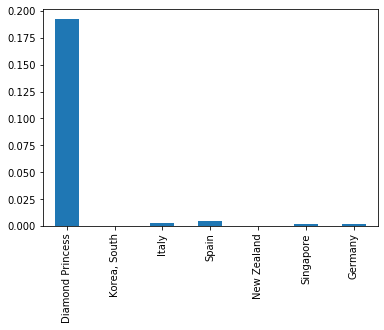

time: 149 ms


In [4]:
pd.Series(dic).plot.bar()

In [17]:
pd.Series(dic).describe()

count    7.000000
mean     0.029157
std      0.072013
min      0.000207
25%      0.001054
50%      0.001815
75%      0.003770
max      0.192432
dtype: float64

time: 4.99 ms


# Plot Tests

Beta1:0.31118164052008357 Beta2:0.2 Gamma:0.07147303818175076 S_0:2999841.4972222224
Beta1:0.31118164052008357 
Beta2:0.2 
Gamma:0.07147303818175076 | 13.991289938690901 days 
Gamma I:0.07142857142857142 | 14.0 days
Gamma H:0.023809523809524363 | 41.99999999999903 days
Omega:0.1251245002985692 | 7.99203990916106 days
S0:2999841.4972222224 
Delta:0.47878787878787876 
Lambda:0.5002740242992446 
R0_initial:4.353832556113974
R0_quarantine:2.7982579877381806


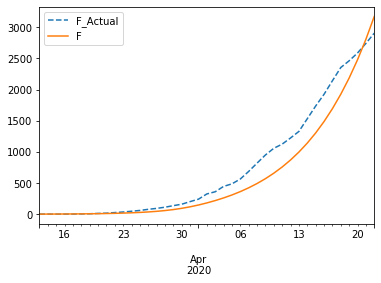

time: 1.36 s


In [2]:
# Versão mais parecida com a utilizada no PPT
hospRate = 0.05
#deltaUpperBound = 0.035 / hospRate
deltaUpperBound = 79/165
gi = 0.07
gh = 0.07
omega = 0.07


# Mudar omega bouds / 
N=200e6

t1 = SIHRF_Sigmoid(country = 'Brazil',
         N=N,
         # N=1e6,
         alpha=.7,
         nth=100,
         daysToHosp=4,  # big for detction
         daysToLeave=12,
         daysPredict=150,
         infectedAssumption=1,
         # forcedBeta = 3,
         quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         # estimateBeta2 = True
         # opt='SLSQP',
         R0bounds=(0,20),
         hospRate=hospRate,
           
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         S0pbounds=(.015, .015),
         delta_bounds=(0, deltaUpperBound),
         betaBounds=(0.20, 1.5),
         gammaBounds=(0.05, .15),
         gamma_i_bounds=(1/(14), 1/(5)),
         gamma_h_bounds=(1/(6*7), 1/(3*7)),
         omega_bounds=(1/(12), 1/(3)),
                   
         #restricted - EM Algo
         #S0pbounds=(1e6 / 200e6, 50e6 / 200e6),
         #delta_bounds=(deltaUpperBound, deltaUpperBound),
         #betaBounds=(0.2, 0.4),
         #gammaBounds=(0, 1),
         #gamma_i_bounds=(1/(15), 1/(15)),
         #gamma_h_bounds=(1/(4*7), 1/(4*7)),
         #omega_bounds=(1/(10), 1/(10)),
           
         #restricted 
         #S0pbounds=(.5e6 / 200e6, 50e6 / 200e6),
         #delta_bounds=(deltaUpperBound, deltaUpperBound),
         #betaBounds=(0.4, 0.2),
         #gammaBounds=(0, 1),
         #gamma_i_bounds=(gi, gi),
         #gamma_h_bounds=(gh, gh),
         #omega_bounds=(omega, omega),
           
         #omega_bounds=(1/12, 1/12),
         alphas=(0.025,0.005,.97),
           adjust_recovered=True,
         )

t1.train()
#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.F_fit_plot()

MSE: 146.0610478556417


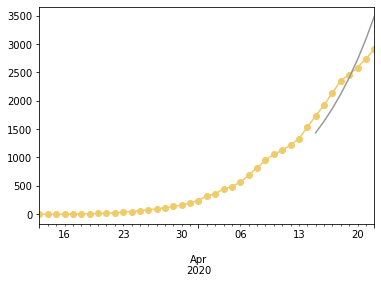

time: 1.24 s


In [3]:
t1.outOfSample_forecast(days=7)

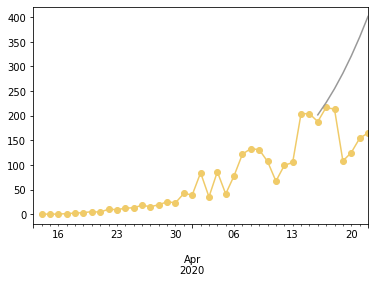

time: 242 ms


In [4]:
t1.outOfSample_plot(days=7, diff=True)

In [18]:
((t1.F_actual.loc[:t1.end_data] - t1.forecast['F'].loc[:t1.end_data])).tail(20)

2020-04-03    121.866247
2020-04-04    161.040704
2020-04-05    149.236032
2020-04-06    167.618773
2020-04-07    222.255189
2020-04-08    279.097144
2020-04-09    323.999472
2020-04-10    333.663894
2020-04-11    290.618121
2020-04-12    265.215851
2020-04-13    229.636771
2020-04-14    274.886559
2020-04-15    299.796881
2020-04-16    286.091384
2020-04-17    276.390611
2020-04-18    234.536383
2020-04-19     56.198531
2020-04-20   -140.045322
2020-04-21   -345.709759
2020-04-22   -582.401575
dtype: float64

time: 3.96 ms


In [17]:
t1.F_actual.loc[:t1.end_data]

2020-03-13       0
2020-03-14       0
2020-03-15       0
2020-03-16       0
2020-03-17       1
2020-03-18       3
2020-03-19       6
2020-03-20      11
2020-03-21      15
2020-03-22      25
2020-03-23      34
2020-03-24      46
2020-03-25      59
2020-03-26      77
2020-03-27      92
2020-03-28     111
2020-03-29     136
2020-03-30     159
2020-03-31     201
2020-04-01     240
2020-04-02     324
2020-04-03     359
2020-04-04     445
2020-04-05     486
2020-04-06     564
2020-04-07     686
2020-04-08     819
2020-04-09     950
2020-04-10    1057
2020-04-11    1124
2020-04-12    1223
2020-04-13    1328
2020-04-14    1532
2020-04-15    1736
2020-04-16    1924
2020-04-17    2141
2020-04-18    2354
2020-04-19    2462
2020-04-20    2587
2020-04-21    2741
2020-04-22    2906
Name: Brazil, dtype: int64

time: 3.97 ms


In [12]:
t1.end_data

Timestamp('2020-04-22 00:00:00')

time: 4.93 ms


In [ ]:
Thailand e japan e china

# PAREI NO CALCULO DO MSE, CALCULAR MSE OUT OF SAMPLE E IN SAMPLE
# achar pela planilha os que bateu 100 casos antes

# New algo - S0 a minimizar o erro out of sample dos últimos 7 dias - checar estabilidade


In [4]:
3943868.945275071 - 3734289.8809321783

209579.06434289273

time: 1.97 ms


In [15]:
t1.df['F_Actual'].loc[:t1.end_data].shape[0]

41

time: 1.99 ms


In [18]:
t1.df['F_Actual'].head(45)

2020-03-13       0.0
2020-03-14       0.0
2020-03-15       0.0
2020-03-16       0.0
2020-03-17       1.0
2020-03-18       3.0
2020-03-19       6.0
2020-03-20      11.0
2020-03-21      15.0
2020-03-22      25.0
2020-03-23      34.0
2020-03-24      46.0
2020-03-25      59.0
2020-03-26      77.0
2020-03-27      92.0
2020-03-28     111.0
2020-03-29     136.0
2020-03-30     159.0
2020-03-31     201.0
2020-04-01     240.0
2020-04-02     324.0
2020-04-03     359.0
2020-04-04     445.0
2020-04-05     486.0
2020-04-06     564.0
2020-04-07     686.0
2020-04-08     819.0
2020-04-09     950.0
2020-04-10    1057.0
2020-04-11    1124.0
2020-04-12    1223.0
2020-04-13    1328.0
2020-04-14    1532.0
2020-04-15    1736.0
2020-04-16    1924.0
2020-04-17    2141.0
2020-04-18    2354.0
2020-04-19    2462.0
2020-04-20    2587.0
2020-04-21    2741.0
2020-04-22    2906.0
2020-04-23       NaN
2020-04-24       NaN
2020-04-25       NaN
2020-04-26       NaN
Name: F_Actual, dtype: float64

time: 3.96 ms
